```
I will add description later.
```
Notebook on Finite Element Framework on Julia
---
There are multiple finite element packages on Julia and list can be found at [FEM packages](http://www.juliafem.org/)

Some are wrapper around famous packages and a few are originally written in Julia and one of them is ``Gritap``

Gridap is able to solve different types of PDEs:

- linear and nonlinear
- Steady state, state-dependent, and time-dependent
- Single field and multi-physics
- PDEs in 1D, 2D, 3D, 4D, 5D, …

with different types of Finite Element techniques:

- Continuous and Discontinuous Galerkin methods
- Grad, div, and curl-conforming interpolations of arbitrary order
- Embedded Finite Elements (AgFEM and CutFEM)

The library design is based on lazy data-structures that represent objects (e.g., elemental matrices and vectors) on the entire computational domain. 
This allows us the library developers to hide assembly loops and other core computations from the user-code leading to a very compact, user-friendly syntax, while providing a high degree of flexibility to users to define their own FE solvers.

what is lazy data structure?
[tutorial site](https://gridap.github.io/Tutorials/dev/pages/t001_poisson/)

In [4]:
using Gridap
# FE mesh (aka discrete model)
#url = "https://raw.githubusercontent.com/gridap/Tutorials/master/models/model.json"
model = DiscreteModelFromFile(download(url,"model.json"))

UnstructuredDiscreteModel()

In [13]:
writevtk(model,"model")

4-element Vector{Vector{String}}:
 ["model_0.vtu"]
 ["model_1.vtu"]
 ["model_2.vtu"]
 ["model_3.vtu"]

In [7]:
# Test and trial FE spaces
order = 1
reffe = ReferenceFE(lagrangian,Float64,order)
V0 = TestFESpace(model,reffe;conformity=:H1,dirichlet_tags="sides")

UnconstrainedFESpace()

In [8]:
g(x) = 2.0
Ug = TrialFESpace(V0,g)

TrialFESpace()

In [10]:
# Volume terms
degree = 2
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [11]:
neumanntags = ["circle", "triangle", "square"]
Γ = BoundaryTriangulation(model,tags=neumanntags)
dΓ = Measure(Γ,degree)

Measure()

## Weak form

In [14]:
f(x) = 1.0
h(x) = 3.0
a(u,v) = ∫( ∇(v)⋅∇(u) )*dΩ
b(v) = ∫( v*f )*dΩ + ∫( v*h )*dΓ

b (generic function with 1 method)

In [15]:
op = AffineFEOperator(a,b,Ug,V0)

AffineFEOperator()

In [16]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [17]:
uh = solve(solver,op)

SingleFieldFEFunction():
 num_cells: 29160
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 3021518092337348632

In [18]:
writevtk(Ω,"results",cellfields=["uh"=>uh])

(["results.vtu"],)

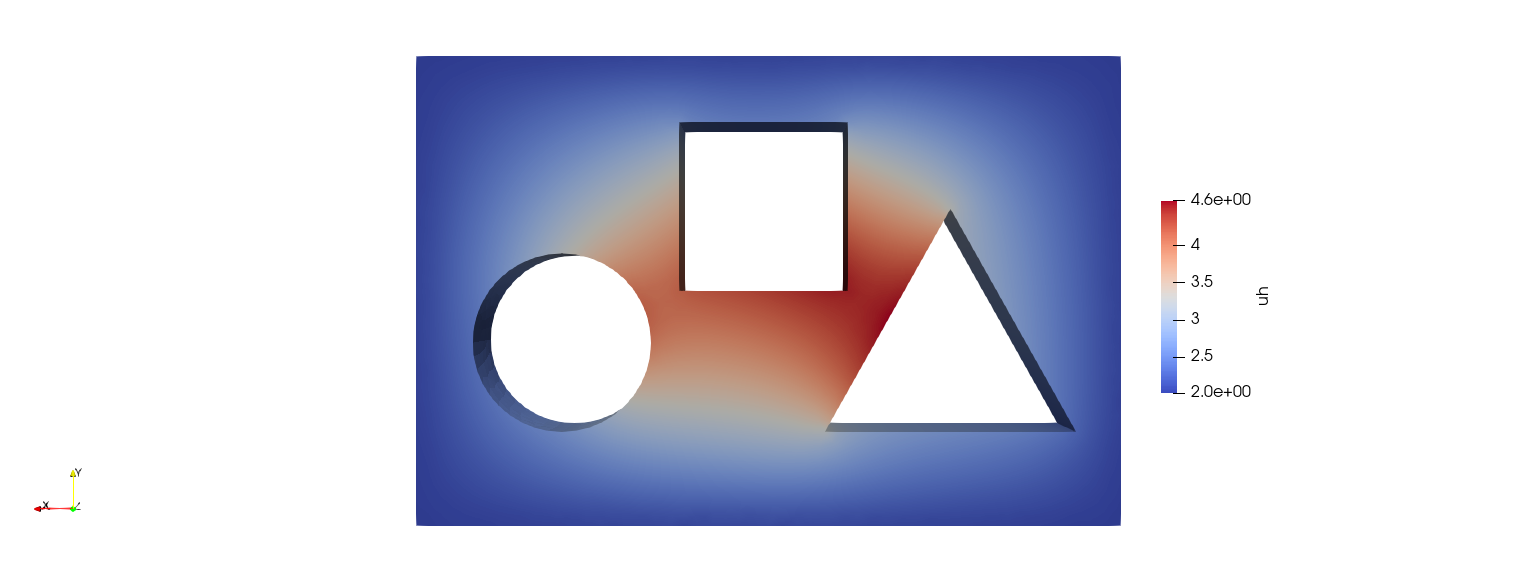

In [19]:
import Mads
Mads.display("gridap_fe_sol.png")